In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE


# DATA

In [2]:
df = pd.read_csv('output/sentiment_result.csv', encoding='utf-8')
df.head()

,user_id,user_name,date,text,Sentiment
0,1.360000e+18,rrraA,2022-10-11 19:30:04+00:00,inget gas money heist korea kelar,Negative
1,1.510000e+18,lysaa,2022-10-11 17:04:25+00:00,selesai watching money heist korea ending gant...,Negative
2,1.510000e+18,lysaa,2022-10-11 17:02:50+00:00,bosan banget money heist korea uang kisah cint...,Positive
3,1.510000e+18,lysaa,2022-10-11 17:02:10+00:00,money heist korea tokyo ngeselin badass lin da...,Negative
4,1.570000e+18,kalun,2022-10-11 15:49:18+00:00,money heist suka curi,Negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2000 non-null   float64
 1   user_name  1767 non-null   object 
 2   date       2000 non-null   object 
 3   text       2000 non-null   object 
 4   Sentiment  2000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 78.2+ KB


In [4]:
df.shape

(2000, 5)

In [7]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ['Sentiment']]

target = "Sentiment"
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]
print(X.shape)
print(Y.shape)

(2000, 4)
(2000,)


In [8]:
df.isnull().sum()

user_id        0
user_name    233
date           0
text           0
Sentiment      0
dtype: int64

# Plot Data

In [12]:
label = df['Sentiment'].unique().tolist()

Text(0, 0.5, 'Freq')

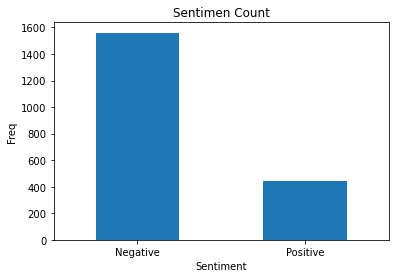

In [13]:
count_label = pd.value_counts(df['Sentiment'], sort=True)
count_label.plot(kind='bar', rot=0)
plt.title("Sentimen Count")
plt.xticks(range(2), label)
plt.xlabel("Sentiment")
plt.ylabel("Freq")

In [14]:
#Labels
pos_label = df[df['Sentiment'] == 'Positive']
neg_label = df[df['Sentiment'] == 'Negative']

In [23]:
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X, Y)
print(X_train_smote.shape, y_train_smote.shape)

ValueError: could not convert string to float: 'rrraA'